Task 1 of Technocolabs software

In [2]:
import pandas as pd
data = pd.read_csv('Attrition Dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv')



<>:2: SyntaxWarning: invalid escape sequence '\W'
<>:2: SyntaxWarning: invalid escape sequence '\W'
C:\Users\sanke\AppData\Local\Temp\ipykernel_17792\473142317.py:2: SyntaxWarning: invalid escape sequence '\W'
  data = pd.read_csv('Attrition Dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv')


In [14]:
print(data.head())  

# print(data.describe()) 

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

Now we will perform data cleaning by handling the null values


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

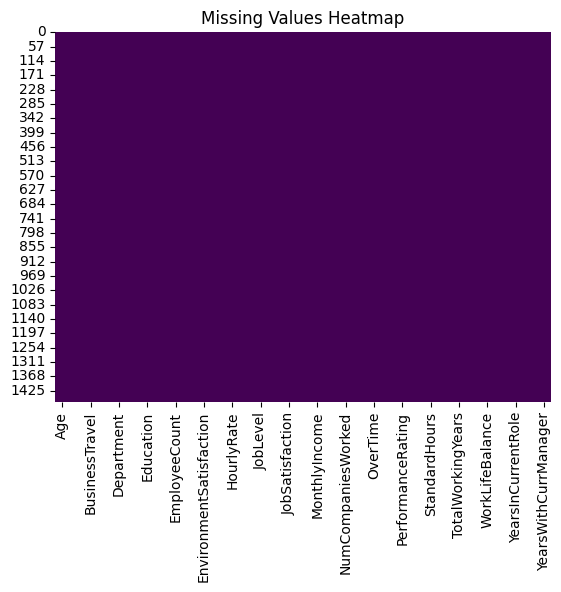

In [30]:
# Check for missing values in each column
print(data.isnull().sum())

# Visualize missing values using a heatmap (optional)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Since your data has no missing values, nothing needs to be done here.


In [9]:
# Check for duplicates
print(f"Duplicate rows: {data.duplicated().sum()}")

# Drop duplicates
data = data.drop_duplicates()


Duplicate rows: 0


In [11]:
#Now we will perform univariate analysis

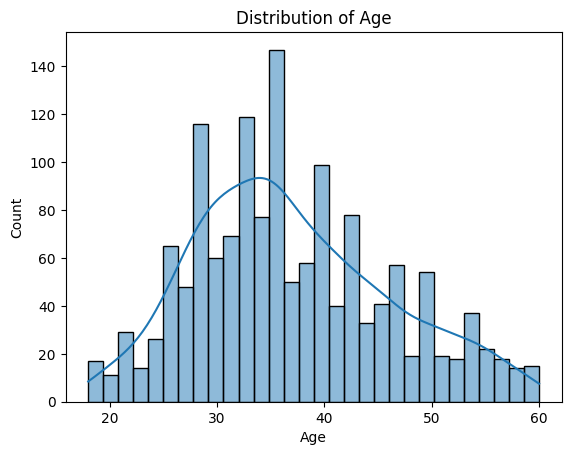

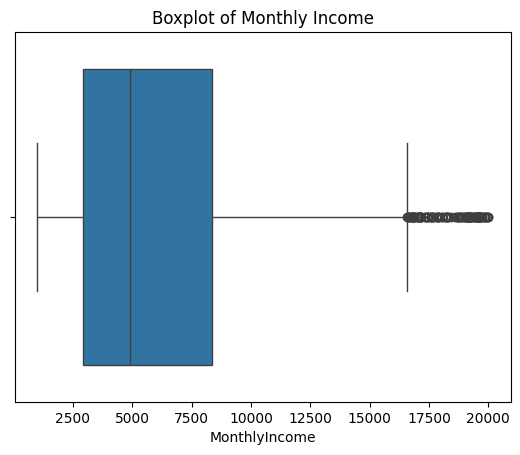

In [31]:
# Histogram for 'Age'
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.show()

# Boxplot to identify outliers in 'MonthlyIncome'
sns.boxplot(x=data['MonthlyIncome'])
plt.title('Boxplot of Monthly Income')
plt.show()


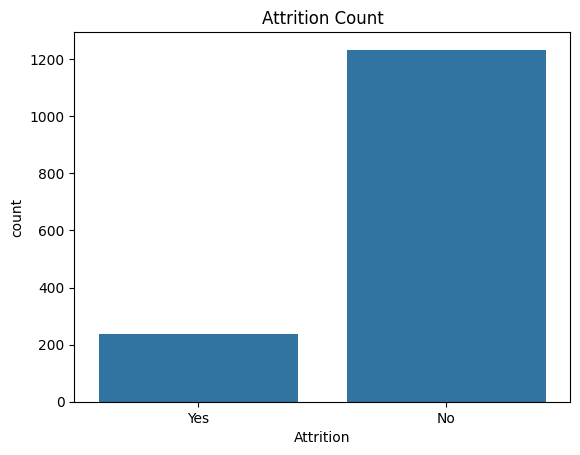

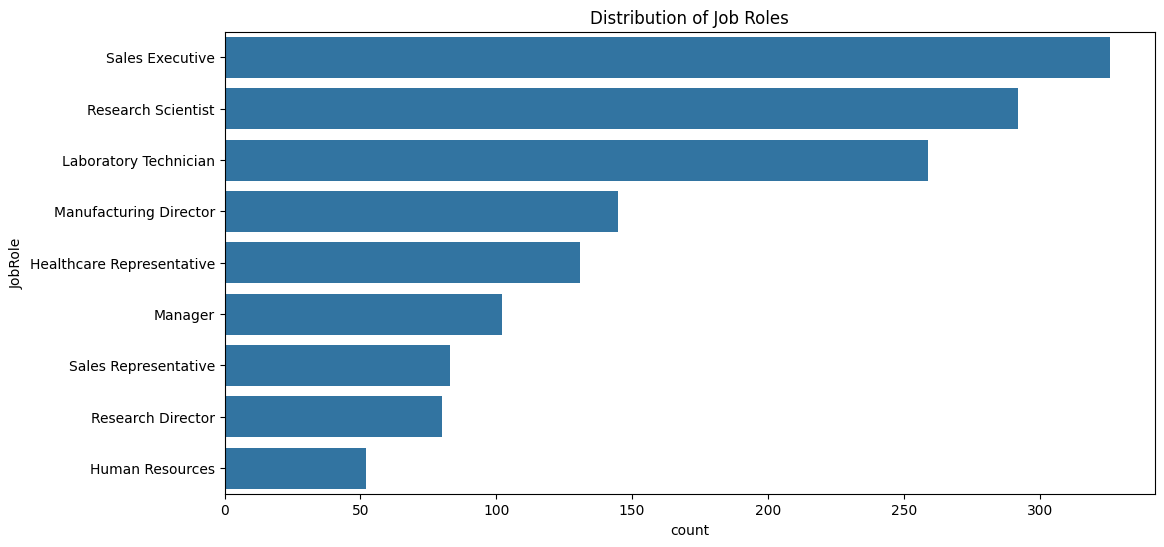

In [32]:
# Count plot for 'Attrition'
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Count')
plt.show()

# Count plot for 'JobRole'
plt.figure(figsize=(12, 6))
sns.countplot(y='JobRole', data=data)
plt.title('Distribution of Job Roles')
plt.show()


In [16]:
#Now we will do bivariate analysis for the same for years of working in company and monthly income 

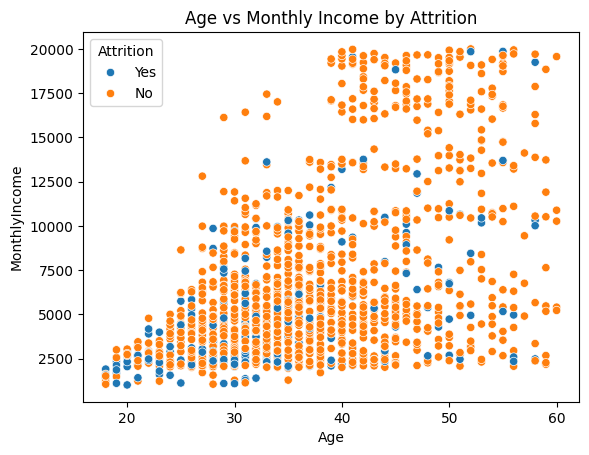

In [34]:
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=data)
plt.title('Age vs Monthly Income by Attrition')
plt.show()


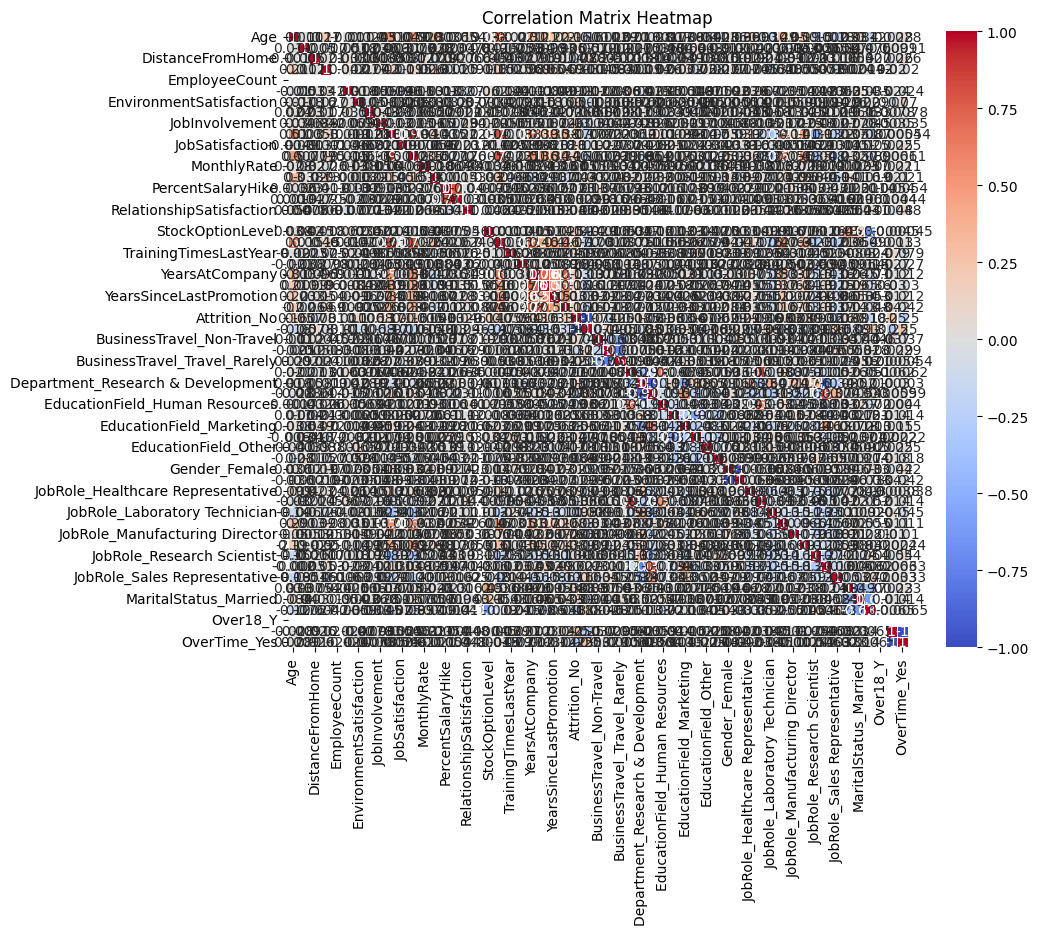

In [36]:
# Convert categorical columns to numeric using one-hot encoding
numeric_data = pd.get_dummies(data)

# Generate the correlation matrix
corr_matrix = numeric_data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [24]:
# # Pairplot of selected columns
# sns.pairplot(data[['feature1', 'feature2', 'feature3']])
# plt.show()


In [25]:
#Outlier detection and treatment 

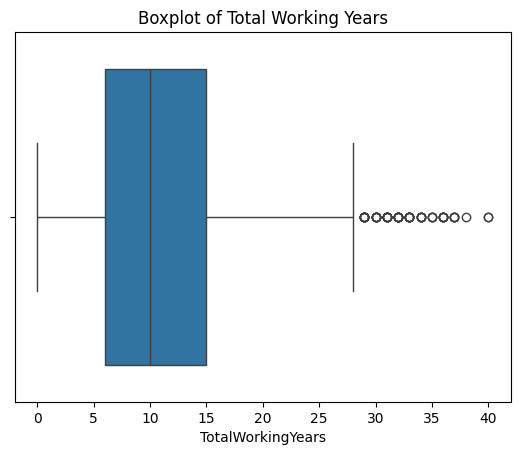

Dataset shape after removing outliers: (1407, 35)


In [37]:
# Boxplot for detecting outliers in 'TotalWorkingYears'
sns.boxplot(x=data['TotalWorkingYears'])
plt.title('Boxplot of Total Working Years')
plt.show()

# Handling outliers using Interquartile Range (IQR)
Q1 = data['TotalWorkingYears'].quantile(0.25)
Q3 = data['TotalWorkingYears'].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows with outliers
data = data[(data['TotalWorkingYears'] >= Q1 - 1.5 * IQR) & 
            (data['TotalWorkingYears'] <= Q3 + 1.5 * IQR)]
print(f"Dataset shape after removing outliers: {data.shape}")


In [38]:
#data encoding

In [39]:
# Convert 'Attrition' column into binary values: Yes -> 1, No -> 0
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# One-hot encoding for 'BusinessTravel'
data = pd.get_dummies(data, columns=['BusinessTravel'], drop_first=True)

# Display the first few rows to confirm changes
print(data.head())


   Age  Attrition  DailyRate              Department  DistanceFromHome  \
0   41          1       1102                   Sales                 1   
1   49          0        279  Research & Development                 8   
2   37          1       1373  Research & Development                 2   
3   33          0       1392  Research & Development                 3   
4   27          0        591  Research & Development                 2   

   Education EducationField  EmployeeCount  EmployeeNumber  \
0          2  Life Sciences              1               1   
1          1  Life Sciences              1               2   
2          2          Other              1               4   
3          4  Life Sciences              1               5   
4          1        Medical              1               7   

   EnvironmentSatisfaction  ... StockOptionLevel  TotalWorkingYears  \
0                        2  ...                0                  8   
1                        3  ...         

C:\Users\sanke\AppData\Local\Temp\ipykernel_17792\3962388582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})


In [40]:
#Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical columns like 'Age', 'MonthlyIncome'
scaler = StandardScaler()
data[['Age', 'MonthlyIncome']] = scaler.fit_transform(data[['Age', 'MonthlyIncome']])

# Check the transformed data
print(data[['Age', 'MonthlyIncome']].head())


        Age  MonthlyIncome
0  0.559796      -0.021926
1  1.489980      -0.222208
2  0.094704      -0.927721
3 -0.370388      -0.737650
4 -1.068026      -0.607920


In [42]:
#multicolinearity

In [43]:
# Identify highly correlated features (threshold > 0.8)
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr.between(0.8, 1.0) & (high_corr != 1.0)]

print("Highly correlated feature pairs:")
print(high_corr)


Highly correlated feature pairs:
OverTime_No                        OverTime_Yes                         1.000000
OverTime_Yes                       OverTime_No                          1.000000
JobLevel                           MonthlyIncome                        0.950300
MonthlyIncome                      JobLevel                             0.950300
Department_Sales                   Department_Research & Development    0.906818
Department_Research & Development  Department_Sales                     0.906818
Department_Human Resources         JobRole_Human Resources              0.904983
JobRole_Human Resources            Department_Human Resources           0.904983
JobRole_Sales Executive            Department_Sales                     0.808869
Department_Sales                   JobRole_Sales Executive              0.808869
dtype: float64


In [44]:
#Summarized insights

In [45]:
print("Dataset Summary:")
print(f"Total Rows: {data.shape[0]}")
print(f"Total Columns: {data.shape[1]}")
print(f"Missing Values:\n{data.isnull().sum()}")
print(f"Duplicate Rows: {data.duplicated().sum()}")

# Example: Attrition distribution
attrition_count = data['Attrition'].value_counts(normalize=True) * 100
print(f"\nAttrition Distribution:\n{attrition_count}")


Dataset Summary:
Total Rows: 1407
Total Columns: 36
Missing Values:
Age                                 0
Attrition                           0
DailyRate                           0
Department                          0
DistanceFromHome                    0
Education                           0
EducationField                      0
EmployeeCount                       0
EmployeeNumber                      0
EnvironmentSatisfaction             0
Gender                              0
HourlyRate                          0
JobInvolvement                      0
JobLevel                            0
JobRole                             0
JobSatisfaction                     0
MaritalStatus                       0
MonthlyIncome                       0
MonthlyRate                         0
NumCompaniesWorked                  0
Over18                              0
OverTime                            0
PercentSalaryHike                   0
PerformanceRating                   0
RelationshipSatisfac

Now we will proceed to make ML Models 

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


In [47]:
# Load the dataset
data = pd.read_csv(r'Attrition Dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Encode categorical variables
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})  # Binary encoding
data = pd.get_dummies(data, drop_first=True)  # One-hot encoding for categorical variables

# Split features and target
X = data.drop('Attrition', axis=1)  # Features
y = data['Attrition']  # Target

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [48]:
#Logistic Regression
# Initialize and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = log_reg.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.58      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.75      0.71      0.72       294
weighted avg       0.88      0.88      0.88       294

Confusion Matrix:
 [[242  13]
 [ 21  18]]


In [49]:
#Decision Tree Classifier

In [50]:
# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       255
           1       0.17      0.18      0.17        39

    accuracy                           0.78       294
   macro avg       0.52      0.52      0.52       294
weighted avg       0.78      0.78      0.78       294

Confusion Matrix:
 [[221  34]
 [ 32   7]]


In [51]:
#Random Forest CLassifier

In [52]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Confusion Matrix:
 [[254   1]
 [ 35   4]]


In [53]:
#SVM

In [54]:
# Initialize and train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
print("SVM Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       255
           1       0.59      0.41      0.48        39

    accuracy                           0.88       294
   macro avg       0.75      0.68      0.71       294
weighted avg       0.87      0.88      0.88       294

Confusion Matrix:
 [[244  11]
 [ 23  16]]


In [55]:
#Hyperparameter Tuning with GridSearchCV

In [56]:
# Example: Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_best_rf = best_rf_model.predict(X_test)
print("Tuned Random Forest Report:")
print(classification_report(y_test, y_pred_best_rf))


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Tuned Random Forest Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       1.00      0.13      0.23        39

    accuracy                           0.88       294
   macro avg       0.94      0.56      0.58       294
weighted avg       0.90      0.88      0.84       294



In [57]:
#model evaluation metrics

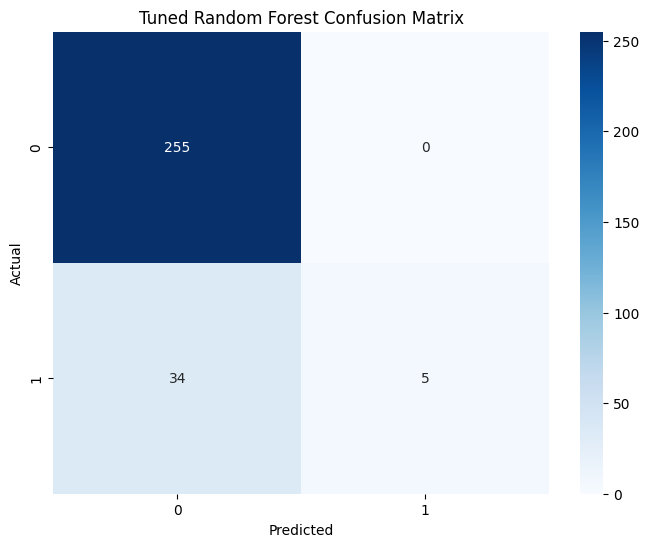

In [58]:
# Function to plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Example: Plot confusion matrix for the best model
plot_confusion_matrix(y_test, y_pred_best_rf, 'Tuned Random Forest Confusion Matrix')
